In [1]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
import sympy as sym
import numpy as np
u = symbols('u')

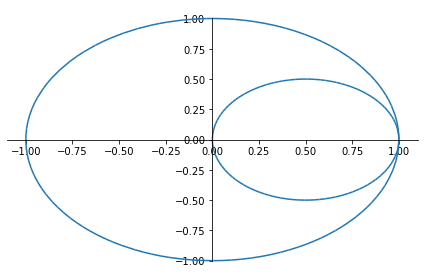

In [71]:
cr = 0.25
r  = 0.25
x  = 1 + 2*r*(sym.cos(u)-1)
y  = -2*cr*sin(u)
plot_parametric((x, y, (u, 0, 2*np.pi)),
(cos(u),sin(u),(u, 0, 2*np.pi)))
# sym.

In [65]:
cr_list = np.linspace(0,2,201)
r_list  = np.linspace(0,2,201)
wave    = np.linspace(0,np.pi,201)
res     = np.empty([201,201])
ind_cr = 0
ind_r  = 0 
# print(res[53,53])
for icr in cr_list:
    ind_r  = 0 
    for ir in r_list:
        # print([ind_cr,ind_r])
        res[ind_cr,ind_r] = np.sqrt(max( (1+2*ir*(np.cos(wave)-1))**2 + (-2*icr*np.sin(wave))**2 ))
        ind_r  = ind_r + 1
    ind_cr = ind_cr+1

In [66]:
np.any(res<1)
# ir = 0.2
# icr = 0.1

# max( (1+2*ir*(np.cos(wave)-1))**2 + (-2*icr*np.sin(wave))**2 )

False

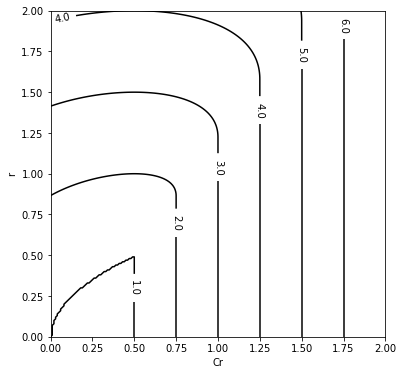

In [69]:
import matplotlib.pyplot as plt
# generate 2 2d grids for the x & y bounds
# g2_matrix = np.array(g2)
# y, x = np.meshgrid(np.linspace(0,2*np.pi,50),cr)
# z = g2_matrix[:,0,:]
# z = z[:-1, :-1]
# print(z.shape)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots(1,1,figsize=(6,6))
# levels = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]
level_selec = [1,2,3,4,5,6,7,8]
# c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=0, vmax=15)
c = ax.contour(cr_list, r_list, res,levels = level_selec, colors="k")
ax.clabel(c,fontsize=10,fmt='%3.1f')
# ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
# ax.legend(loc='upper left')
plt.xlabel('Cr')
plt.ylabel('r')
# fig.colorbar(c, ax=ax,label='Cr')
plt.savefig("stability-2.png")

# plt.show()